# PETSc performance breakdown

This notebook runs timing breakdown using PETSc events:

- Warmup + timed solve per approach and mesh size
- Event times: SNESSolve, KSPSolve, PCSetUp, PCApply, Jacobian/Residual evals, MatAssembly
- Outputs a CSV of results

You can tweak the mesh sizes and approaches as needed.

Highly inspired by this work: https://github.com/thomasgibson/tabula-rasa

In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

from pathlib import Path
from typing import List
import matplotlib.pyplot as plt

from perphil.experiments.iterative_bench import Approach
from perphil.experiments.petsc_profiling import run_perf_sweep, save_perf_csv

RESULTS_PATH = Path("results-conforming-2d/petsc_profiling")

## Parameters

In [2]:
# mesh_sizes: List[int] = [4, 8, 16, 32, 64]  # this is the one for final results
# mesh_sizes: List[int] = [4, 8, 16, 32]
# mesh_sizes: List[int] = [5, 10, 15, 20]
mesh_sizes: List[int] = [5, 10, 15]
approaches: List[Approach] = [
    Approach.PLAIN_GMRES,
    Approach.GMRES_ILU,
    Approach.SS_GMRES,
    Approach.SS_GMRES_ILU,
    Approach.PICARD_MUMPS,
    # Approach.MONOLITHIC_MUMPS,
]
extra_events: List[str] = []

## Run and collect

In [3]:
df = run_perf_sweep(mesh_sizes, approaches, repeats=3, backend="events")
df.sort_values(["nx", "approach"])

[perf] nx=5 GMRES: iters=6, time_total=3.197e-02s, KSPSolve=3.196e-04s, PCApply=7.700e-06s, flops_total=6.773e+05 (backend=events, repeats=3)
[perf] nx=5 GMRES + ILU PC: iters=4, time_total=2.918e-02s, KSPSolve=2.263e-04s, PCApply=3.320e-05s, flops_total=8.565e+05 (backend=events, repeats=3)
[perf] nx=5 Scale-Splitting GMRES: iters=2, time_total=9.269e-02s, KSPSolve=1.950e-03s, PCApply=1.877e-03s, flops_total=6.348e+05 (backend=events, repeats=3)
[perf] nx=5 Scale-Splitting GMRES + ILU PC: iters=2, time_total=1.215e-01s, KSPSolve=5.118e-04s, PCApply=4.726e-04s, flops_total=1.039e+06 (backend=events, repeats=3)
[perf] nx=5 Scaling-Splitting Picard with MUMPS: iters=30, time_total=1.854e+00s, KSPSolve=0.000e+00s, PCApply=0.000e+00s, flops_total=1.010e+08 (backend=events, repeats=3)
[perf] nx=10 GMRES: iters=19, time_total=2.844e-02s, KSPSolve=5.645e-04s, PCApply=1.710e-05s, flops_total=4.607e+06 (backend=events, repeats=3)
[perf] nx=10 GMRES + ILU PC: iters=7, time_total=3.552e-02s, KSPS

,approach,nx,ny,dofs,num_cells,iterations,residual,metadata,time_total,time_total_repeats,...,mflops_MatMult,flops_MatAssemblyEnd,mflops_MatAssemblyEnd,flops_PCSetUp,mflops_PCSetUp,flops_MatAssemblyBegin,mflops_MatAssemblyBegin,flops_total,mem_rss_peak_kb,mem_rss_delta_kb
0,GMRES,5,5,72,25,6,5.277419e-16,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.031969,0.095908,...,2155.636364,0.0,0.0,0.0,0.000000,0.0,0.0,6.772800e+05,283988.0,0.0
1,GMRES + ILU PC,5,5,72,25,4,5.068392e-09,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.029182,0.087546,...,2117.142857,0.0,0.0,36768.0,56.609700,0.0,0.0,8.565180e+05,283988.0,0.0
2,Scale-Splitting GMRES,5,5,72,25,2,2.753446e-08,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.092692,0.278077,...,1120.833333,0.0,0.0,2400.0,0.013596,0.0,0.0,6.347820e+05,286448.0,768.0
3,Scale-Splitting GMRES + ILU PC,5,5,72,25,2,2.753296e-08,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.121519,0.364558,...,1738.344827,0.0,0.0,2400.0,0.009955,0.0,0.0,1.039338e+06,288496.0,1664.0
4,Scaling-Splitting Picard with MUMPS,5,5,72,25,30,4.099510e-08,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",1.853824,5.561472,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.010116e+08,290416.0,128.0
5,GMRES,10,10,242,100,19,5.200402e-09,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.028437,0.085312,...,2134.919517,0.0,0.0,0.0,0.000000,0.0,0.0,4.606722e+06,291056.0,384.0
6,GMRES + ILU PC,10,10,242,100,7,2.630802e-08,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.035525,0.106574,...,2645.786802,0.0,0.0,286563.0,249.793410,0.0,0.0,4.414740e+06,291824.0,256.0
7,Scale-Splitting GMRES,10,10,242,100,3,3.202411e-12,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.121296,0.363889,...,1464.892562,0.0,0.0,9600.0,0.035093,0.0,0.0,2.817852e+06,293360.0,640.0
8,Scale-Splitting GMRES + ILU PC,10,10,242,100,3,3.202259e-12,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.082785,0.248354,...,2117.973274,0.0,0.0,9600.0,0.059317,0.0,0.0,6.360648e+06,293360.0,0.0
9,Scaling-Splitting Picard with MUMPS,10,10,242,100,114,6.185324e-08,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",6.023425,18.070274,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.660109e+09,293360.0,0.0


## Save CSV (optional)

In [4]:
save_perf_csv(df, RESULTS_PATH / "petsc_perf_breakdown.csv")
df.head()

,approach,nx,ny,dofs,num_cells,iterations,residual,metadata,time_total,time_total_repeats,...,mflops_MatMult,flops_MatAssemblyEnd,mflops_MatAssemblyEnd,flops_PCSetUp,mflops_PCSetUp,flops_MatAssemblyBegin,mflops_MatAssemblyBegin,flops_total,mem_rss_peak_kb,mem_rss_delta_kb
0,GMRES,5,5,72,25,6,5.277419e-16,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.031969,0.095908,...,2155.636364,0.0,0.0,0.0,0.000000,0.0,0.0,677280.0,283988.0,0.0
1,GMRES + ILU PC,5,5,72,25,4,5.068392e-09,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.029182,0.087546,...,2117.142857,0.0,0.0,36768.0,56.609700,0.0,0.0,856518.0,283988.0,0.0
2,Scale-Splitting GMRES,5,5,72,25,2,2.753446e-08,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.092692,0.278077,...,1120.833333,0.0,0.0,2400.0,0.013596,0.0,0.0,634782.0,286448.0,768.0
3,Scale-Splitting GMRES + ILU PC,5,5,72,25,2,2.753296e-08,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.121519,0.364558,...,1738.344827,0.0,0.0,2400.0,0.009955,0.0,0.0,1039338.0,288496.0,1664.0
4,Scaling-Splitting Picard with MUMPS,5,5,72,25,30,4.099510e-08,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",1.853824,5.561472,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,101011599.0,290416.0,128.0


## Plot: Total Time (average wall time), Total Iterations, and FLOPS.

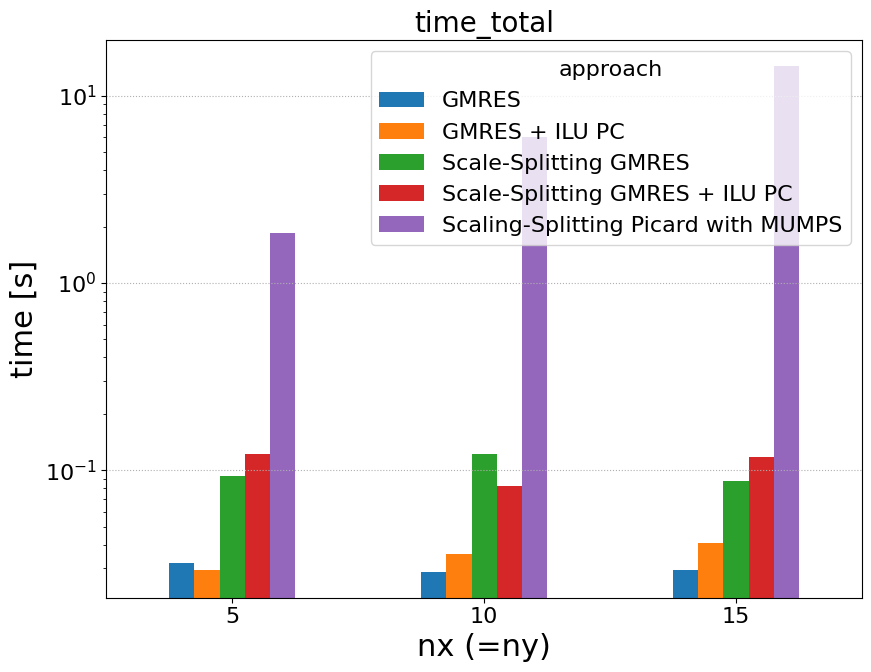

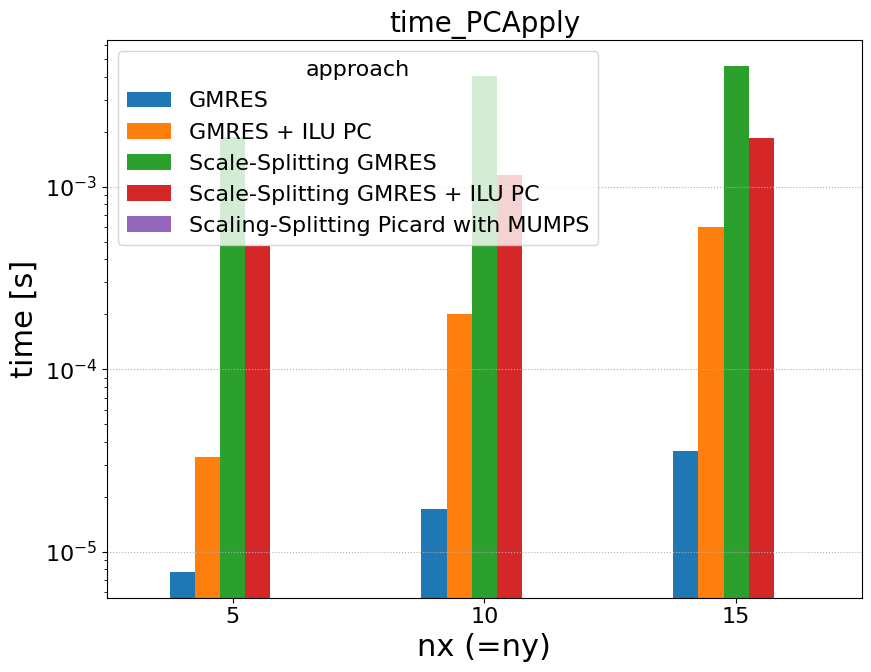

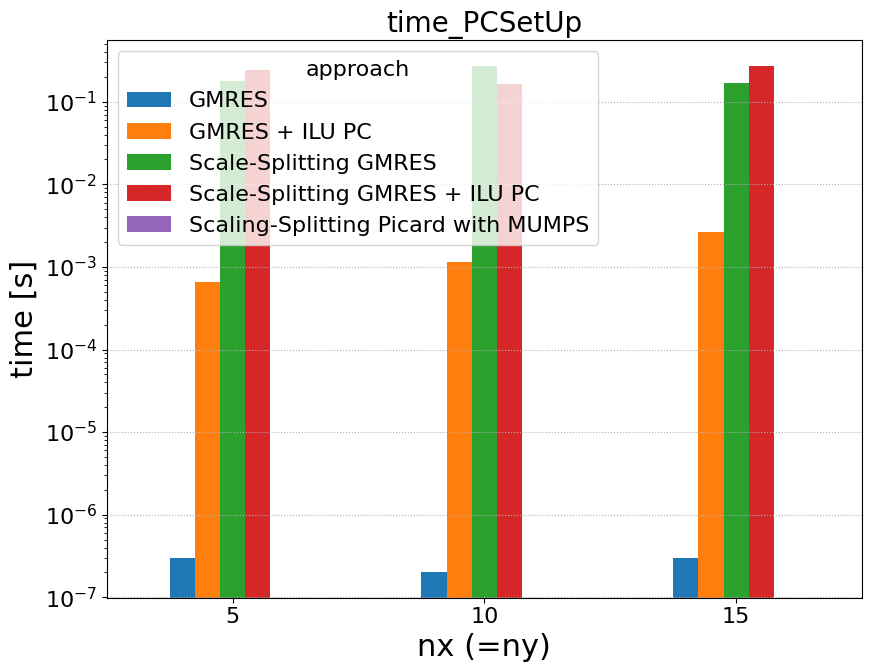

In [5]:
for metric in ("time_total", "time_PCApply", "time_PCSetUp"):
    pivot = df.pivot(index="nx", columns="approach", values=metric).sort_index()
    ax = pivot.plot(kind="bar", figsize=(9, 7), title=metric, logy=True, rot=0)
    ax.set_xlabel("nx (=ny)")
    ax.set_ylabel("time [s]")
    ax.grid(axis="y", ls=":")
    plt.tight_layout()
    plt.savefig(RESULTS_PATH / f"petsc_{metric}_bar.png")
    plt.show()

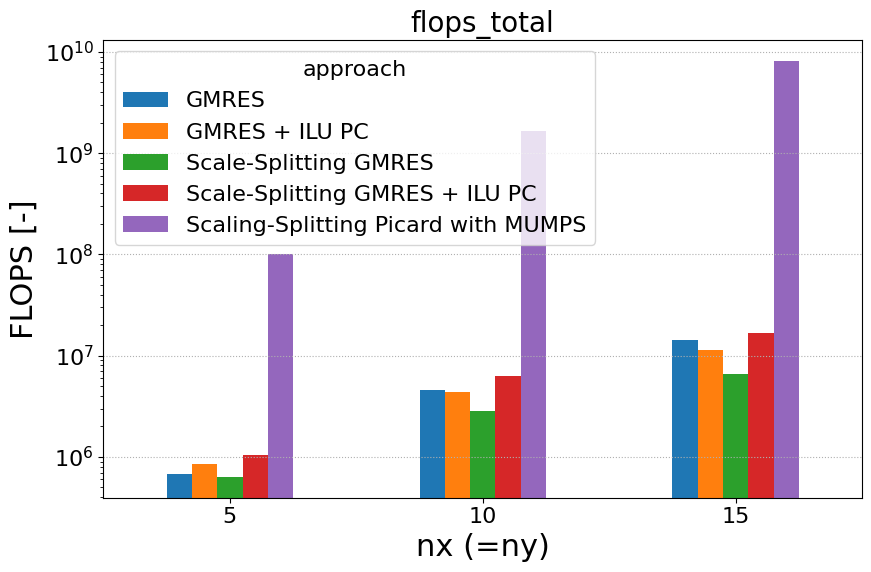

In [6]:
pivot = df.pivot(index="nx", columns="approach", values="flops_total").sort_index()
ax = pivot.plot(kind="bar", figsize=(9, 6), title="flops_total", logy=True, rot=0)
ax.set_xlabel("nx (=ny)")
ax.set_ylabel("FLOPS [-]")
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / "petsc_flops_bar.png")
plt.show()

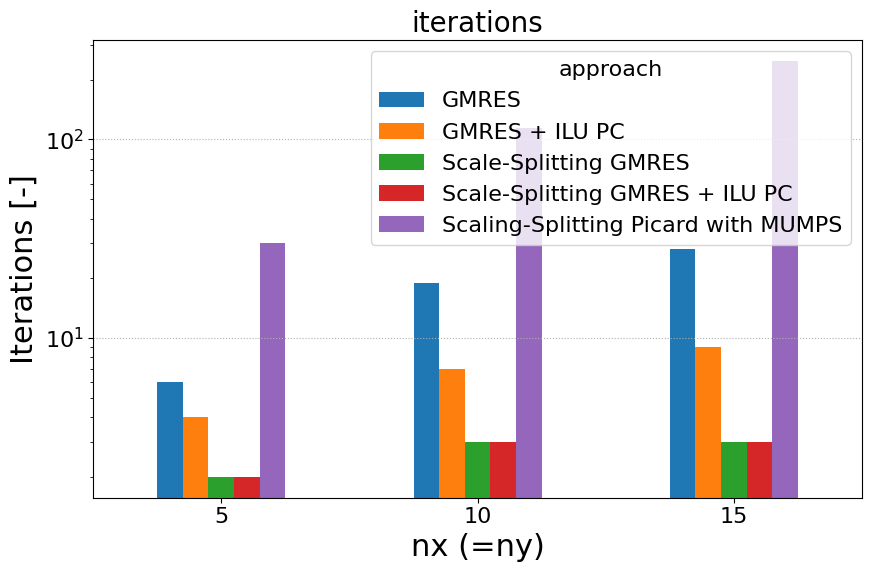

In [7]:
pivot = df.pivot(index="nx", columns="approach", values="iterations").sort_index()
ax = pivot.plot(kind="bar", figsize=(9, 6), title="iterations", logy=True, rot=0)
ax.set_xlabel("nx (=ny)")
ax.set_ylabel("Iterations [-]")
ax.grid(axis="y", ls=":")
plt.tight_layout()
plt.savefig(RESULTS_PATH / "petsc_iterations_bar.png")
plt.show()

In [8]:
df

,approach,nx,ny,dofs,num_cells,iterations,residual,metadata,time_total,time_total_repeats,...,mflops_MatMult,flops_MatAssemblyEnd,mflops_MatAssemblyEnd,flops_PCSetUp,mflops_PCSetUp,flops_MatAssemblyBegin,mflops_MatAssemblyBegin,flops_total,mem_rss_peak_kb,mem_rss_delta_kb
0,GMRES,5,5,72,25,6,5.277419e-16,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.031969,0.095908,...,2155.636364,0.0,0.0,0.0,0.000000,0.0,0.0,6.772800e+05,283988.0,0.0
1,GMRES + ILU PC,5,5,72,25,4,5.068392e-09,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.029182,0.087546,...,2117.142857,0.0,0.0,36768.0,56.609700,0.0,0.0,8.565180e+05,283988.0,0.0
2,Scale-Splitting GMRES,5,5,72,25,2,2.753446e-08,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.092692,0.278077,...,1120.833333,0.0,0.0,2400.0,0.013596,0.0,0.0,6.347820e+05,286448.0,768.0
3,Scale-Splitting GMRES + ILU PC,5,5,72,25,2,2.753296e-08,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.121519,0.364558,...,1738.344827,0.0,0.0,2400.0,0.009955,0.0,0.0,1.039338e+06,288496.0,1664.0
4,Scaling-Splitting Picard with MUMPS,5,5,72,25,30,4.099510e-08,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",1.853824,5.561472,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.010116e+08,290416.0,128.0
5,GMRES,10,10,242,100,19,5.200402e-09,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.028437,0.085312,...,2134.919517,0.0,0.0,0.0,0.000000,0.0,0.0,4.606722e+06,291056.0,384.0
6,GMRES + ILU PC,10,10,242,100,7,2.630802e-08,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.035525,0.106574,...,2645.786802,0.0,0.0,286563.0,249.793410,0.0,0.0,4.414740e+06,291824.0,256.0
7,Scale-Splitting GMRES,10,10,242,100,3,3.202411e-12,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.121296,0.363889,...,1464.892562,0.0,0.0,9600.0,0.035093,0.0,0.0,2.817852e+06,293360.0,640.0
8,Scale-Splitting GMRES + ILU PC,10,10,242,100,3,3.202259e-12,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",0.082785,0.248354,...,2117.973274,0.0,0.0,9600.0,0.059317,0.0,0.0,6.360648e+06,293360.0,0.0
9,Scaling-Splitting Picard with MUMPS,10,10,242,100,114,6.185324e-08,"{'petsc_version': (3, 23, 3), 'firedrake_versi...",6.023425,18.070274,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,1.660109e+09,293360.0,0.0
